# EDA 

In [49]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/raw/Housing.csv")
# https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

In [50]:
print("================================= INFO =================================")
print(df.info())
print("\n================================= COLUMNS =================================")
print(df.columns.values)
print("\n================================= DESCRIBE =================================")
print(df.describe())
print("\n=================================== DF ===================================")
df.head()

================================= INFO =================================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None

================================= COLUMNS =================================

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [51]:
print("=================================== CHECK NULL VALUES ===================================")
print(df.isnull().value_counts())
print("\n=================================== CHECK TYPES ===================================")
print(df.dtypes)
print("\n=================================== CHECK ONLY NUMERIC COLUMNS FOR PREPROCESSING ===================================")
print(df.select_dtypes(include=["int", "float"]))

=================================== CHECK NULL VALUES ===================================
price  area   bedrooms  bathrooms  stories  mainroad  guestroom  basement  hotwaterheating  airconditioning  parking  prefarea  furnishingstatus
False  False  False     False      False    False     False      False     False            False            False    False     False               545
Name: count, dtype: int64

=================================== CHECK TYPES ===================================
price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

=================================== CHECK ONLY NUMERIC COLUMNS FOR PREPROCESSING ===================================
        price  area

# FEATURE ENGINEERING

## Encoding 

In [52]:
print("======================================== ENCODING 'YES', 'NO' values into '1', '0' ========================================")

df[df.select_dtypes(include=["object"]).columns] = (df.select_dtypes(include=["object"])
    .replace(["yes", "no", "furnished", "semi-furnished", "unfurnished"], [1, 0, 2, 1, 0]))

df.head()

======================================== ENCODING 'YES', 'NO' values into '1', '0' ========================================


/var/folders/4l/bwhrbrw57k1djc2163f5ggcc0000gn/T/ipykernel_28078/2604582031.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(["yes", "no", "furnished", "semi-furnished", "unfurnished"], [1, 0, 2, 1, 0]))


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


=============================== SEE THE VALUES IN HIST TO CHECK THE DISTRIBUTION ==============================


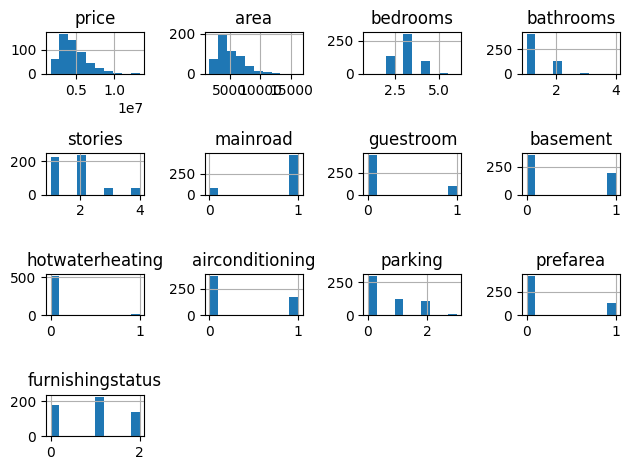

<Axes: >

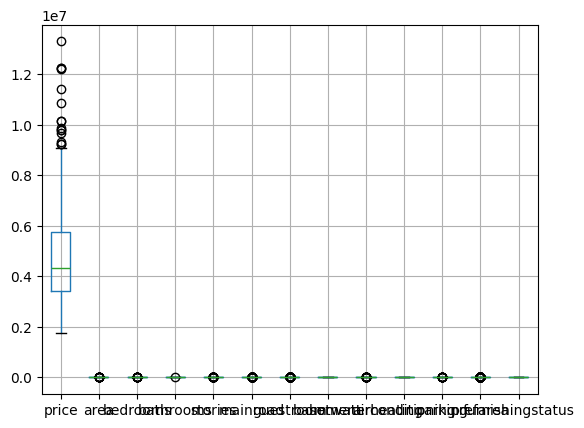

In [53]:
print("=============================== SEE THE VALUES IN HIST TO CHECK THE DISTRIBUTION ==============================")

df.select_dtypes(include="int64").hist()
plt.tight_layout()
plt.show()

df.select_dtypes(include="int64").boxplot()

In [54]:
def engineer_house_features(data_frame):
    # Space features
    df['price_per_sqft'] = df['price'] / df['area']
    df['total_rooms'] = df['bedrooms'] + df['bathrooms']
    df['bath_bed_ratio'] = df['bathrooms'] / df['bedrooms']
    df['bath_bed_ratio'] = df['bath_bed_ratio'].replace([np.inf, -np.inf], np.nan)
    
    # Luxury features
    luxury_cols = ['airconditioning', 'prefarea', 'hotwaterheating', 'guestroom', 'basement']
    df['luxury_score'] = df[luxury_cols].sum(axis=1)
    
    # Property features
    df['is_multi_story'] = (df['stories'] > 1).astype(int)
    df['area_story_interaction'] = df['area'] * df['stories']
    
    return df

df = engineer_house_features(df)

===================== FINDINGS FROM THE HEATMAP =====================
***'price' is highly correlated with 'area', 'bathrooms' and 'airconditioning'***


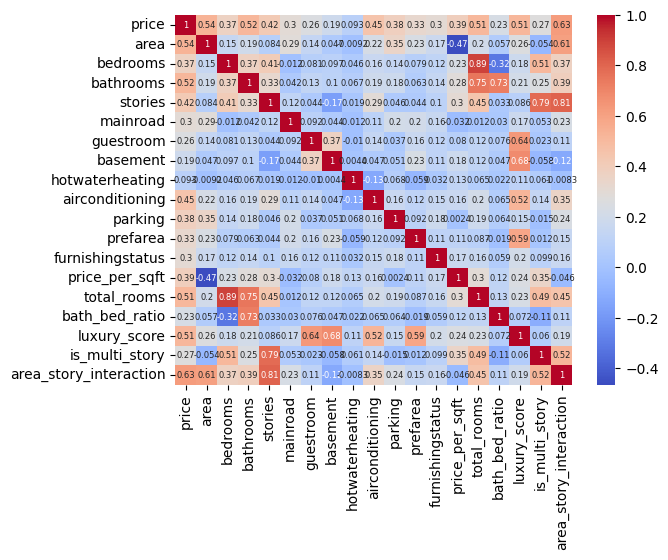

In [59]:
#sns.pairplot(df)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',  annot_kws={"size": 6})
print("===================== FINDINGS FROM THE HEATMAP =====================")
print("***'price' is highly correlated with 'area', 'bathrooms' and 'airconditioning'***")

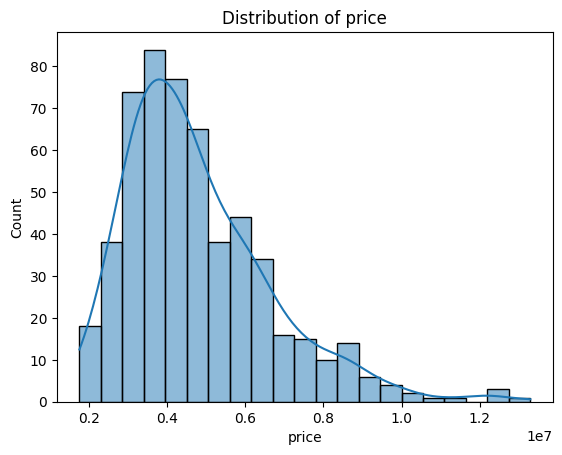

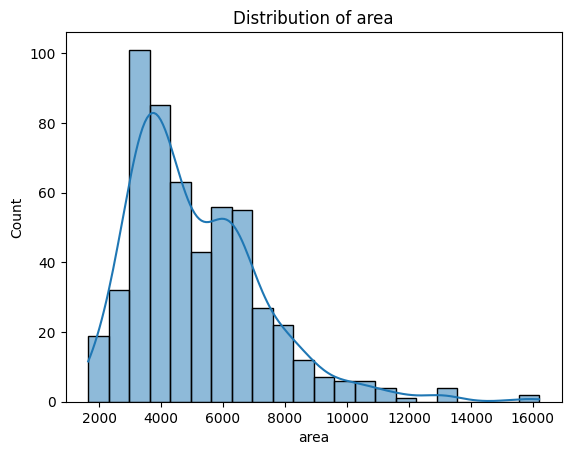

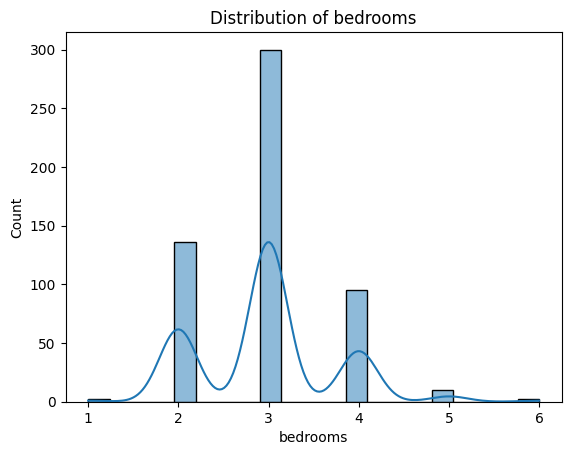

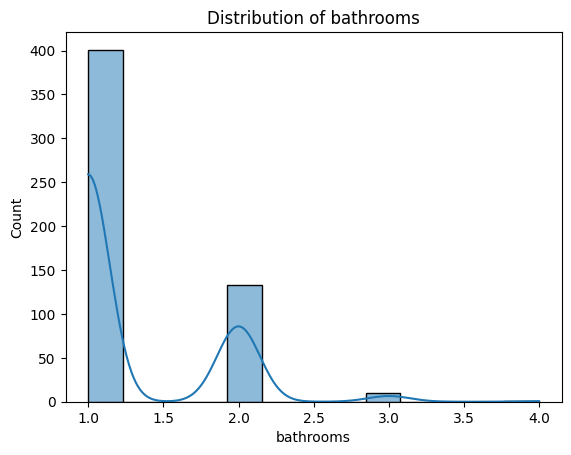

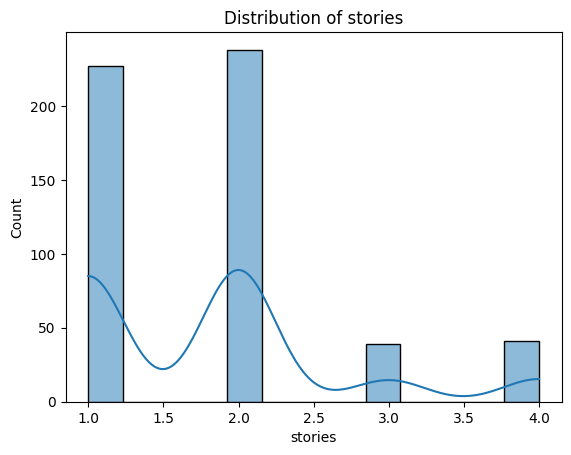

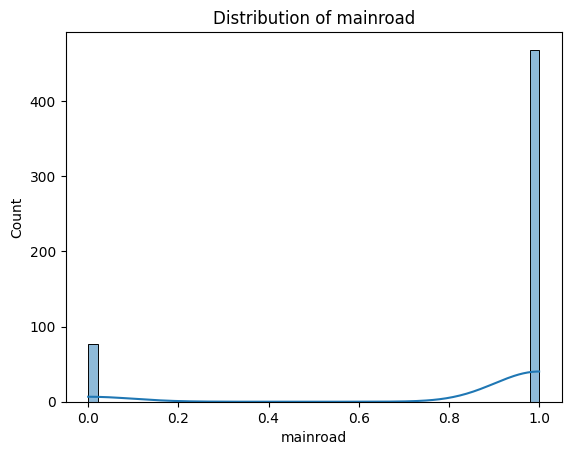

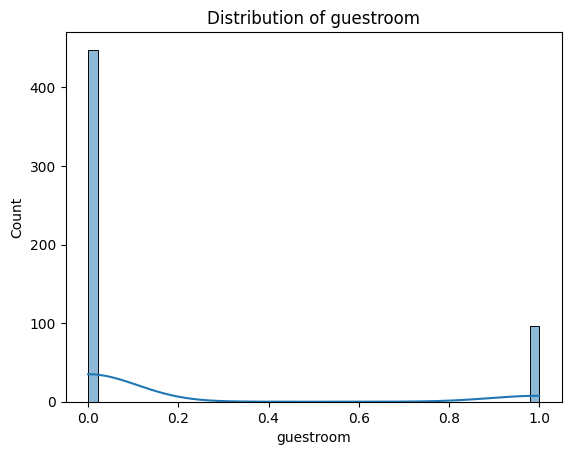

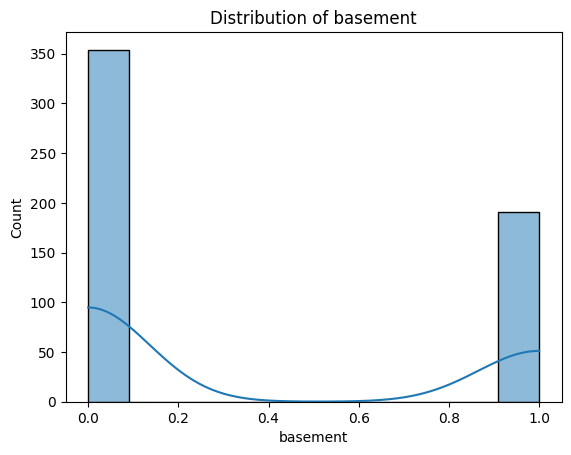

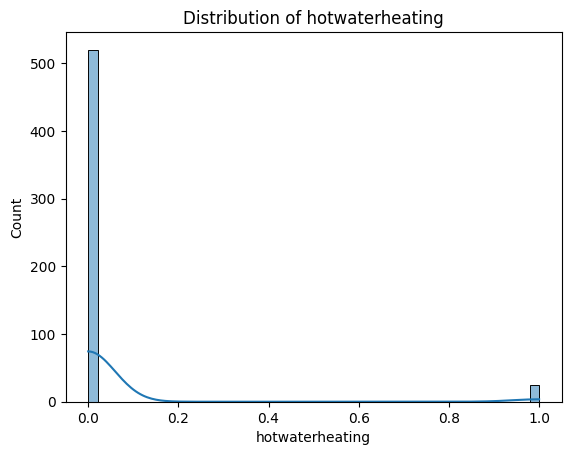

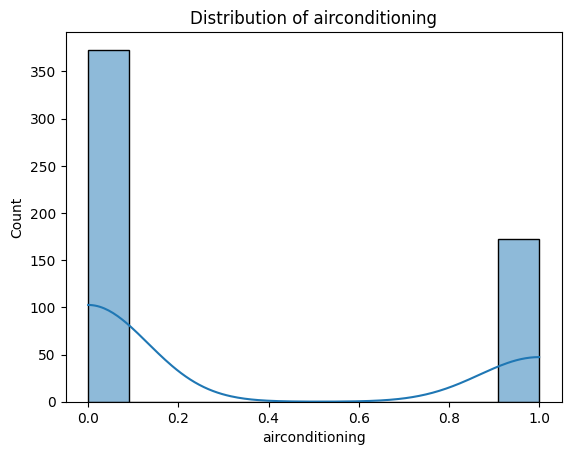

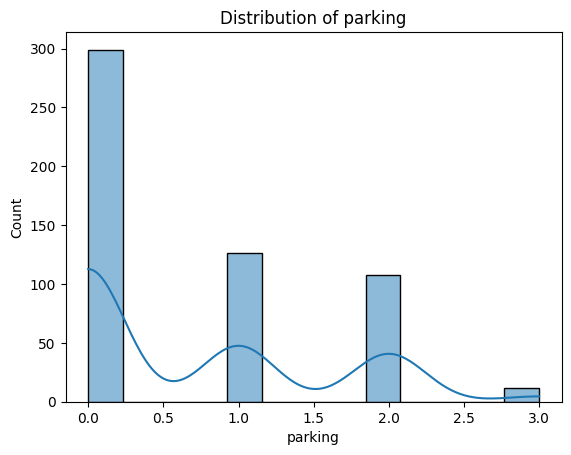

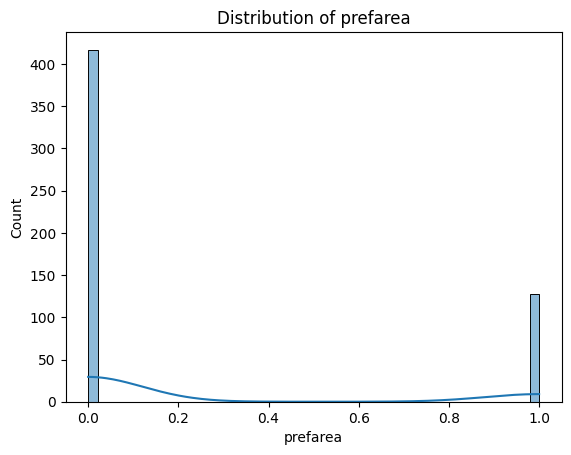

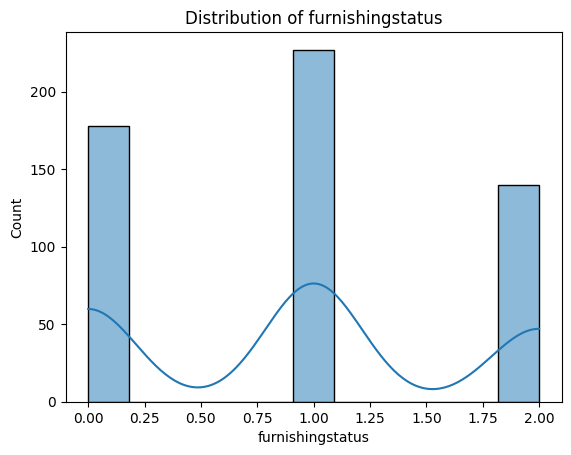

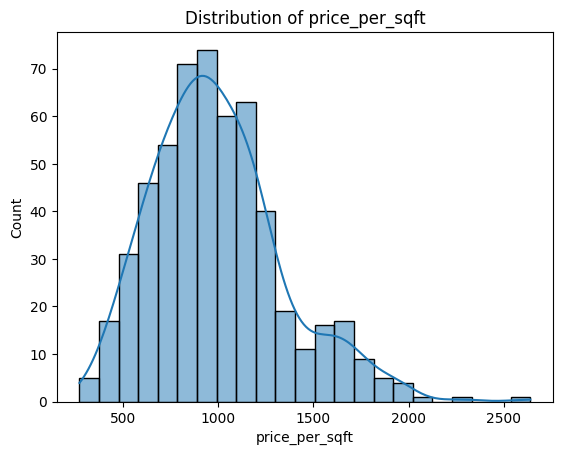

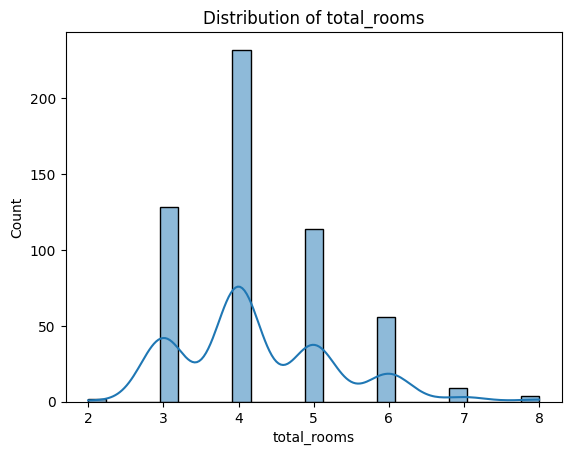

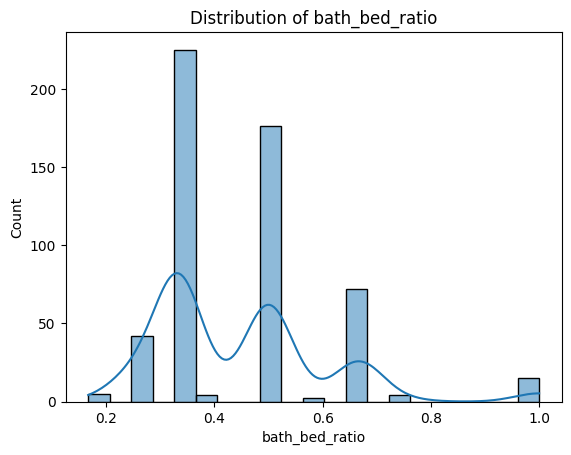

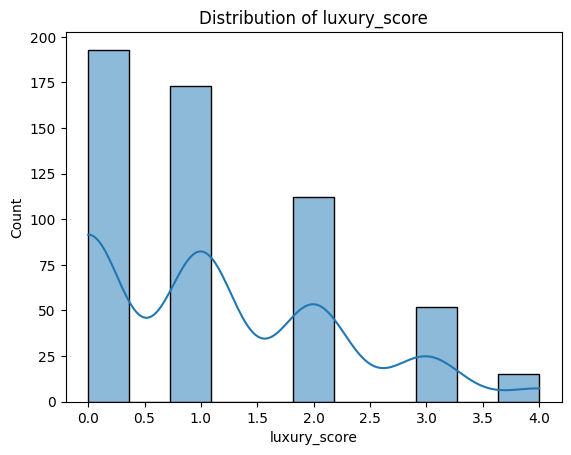

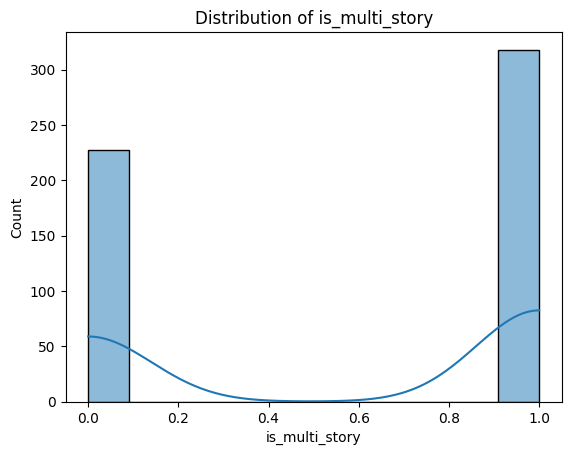

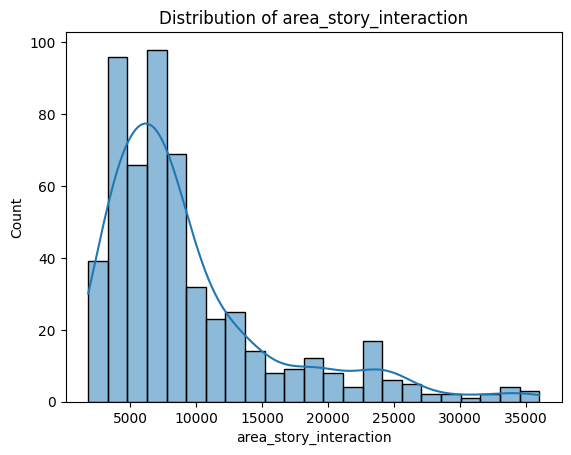

In [69]:
cols = df.columns

for c in cols:
    plt.figure()
    sns.histplot(data=df, x=c, kde=True)
    plt.title(f"Distribution of {c}")
    plt.show()

In [88]:
print("Check the 'price' column, becasue it is very skewed and might have outliers")
sns.boxplot(x=df['price'])

Check the 'price' column, becasue it is very skewed and might have outliers


KeyError: 'price'

In [72]:
df[df['price'] > df['price'].quantile(0.99)]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_per_sqft,total_rooms,bath_bed_ratio,luxury_score,is_multi_story,area_story_interaction
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2,1792.452830,6,0.500000,2,1,22260
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2,1367.187500,8,1.000000,1,1,35840
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,1229.919679,5,0.666667,2,1,19920
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2,1628.666667,6,0.500000,3,1,15000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2,1537.735849,5,0.250000,3,1,14840
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,1,1446.666667,6,1.000000,3,0,7500


=======Visually check the 'MinMaxScaler' and 'LogTransformer'=======
======= And drop the 'scaled_price and area' =======


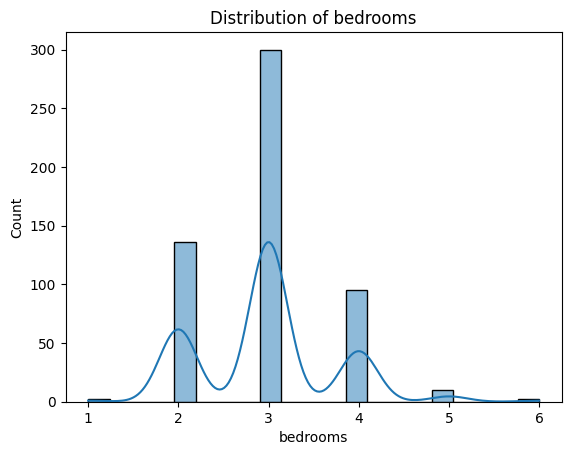

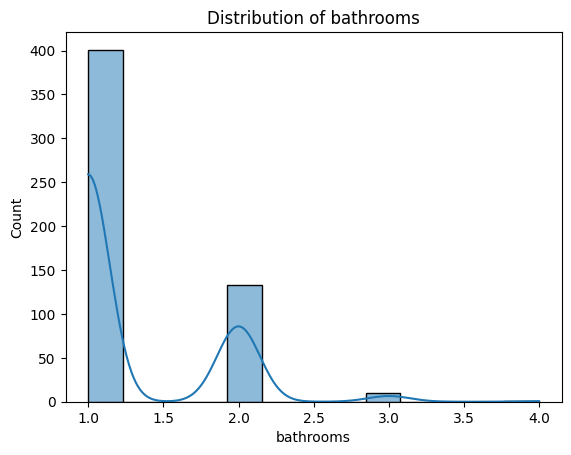

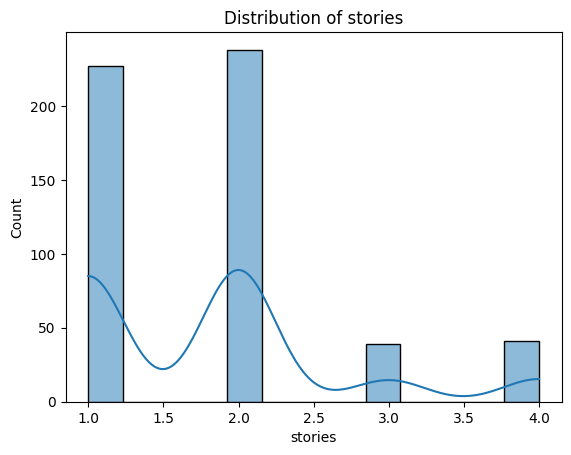

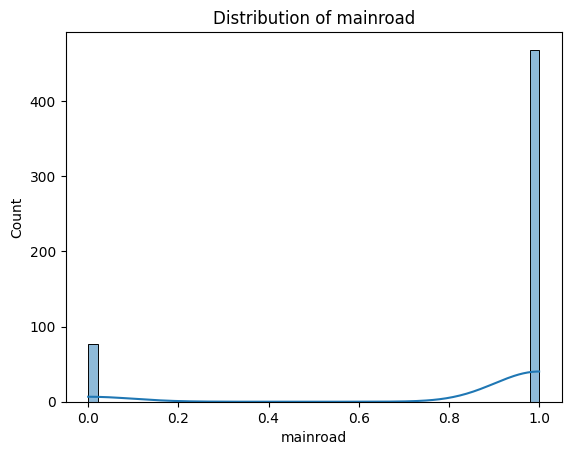

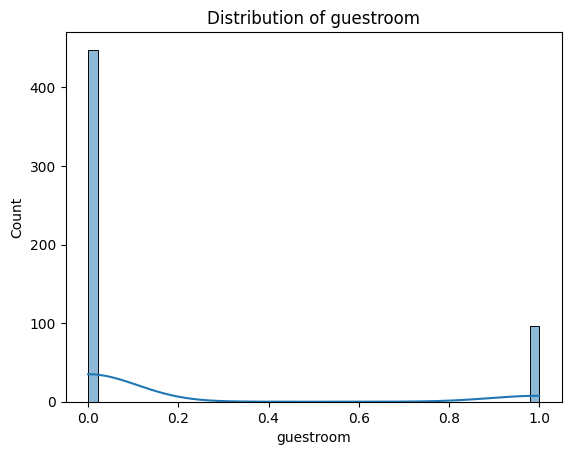

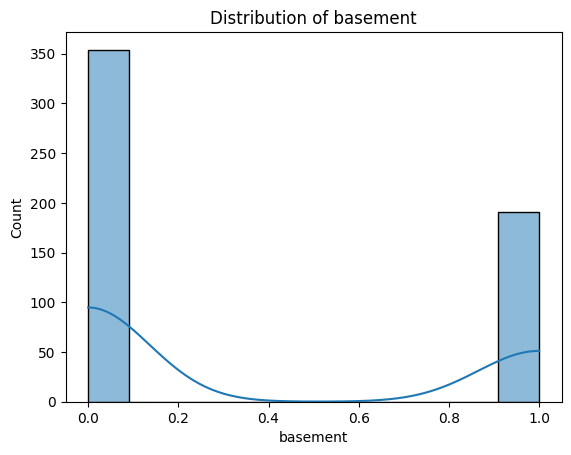

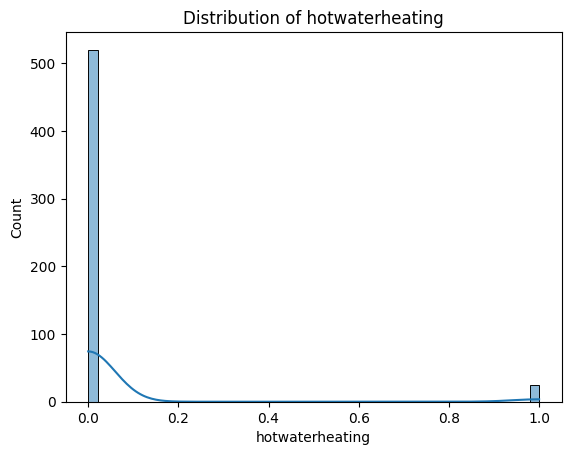

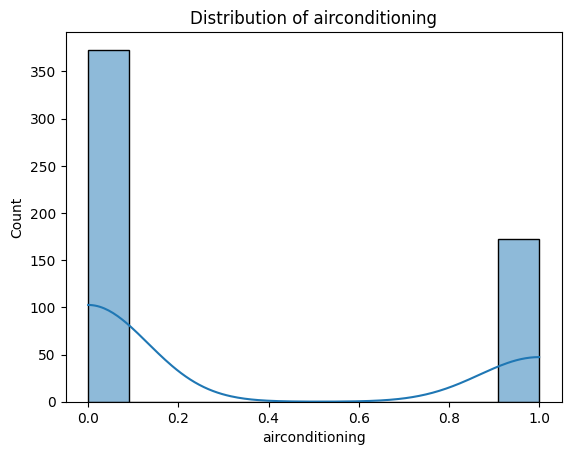

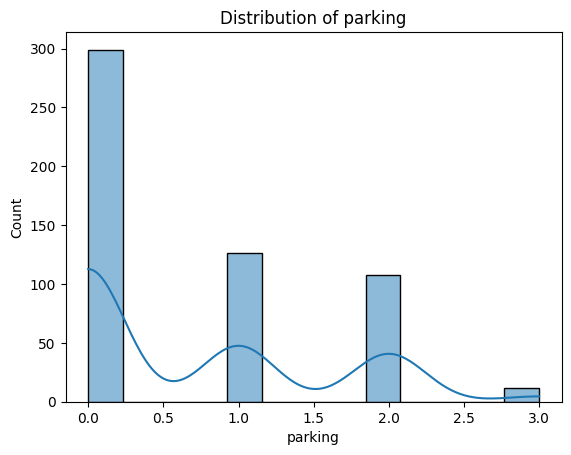

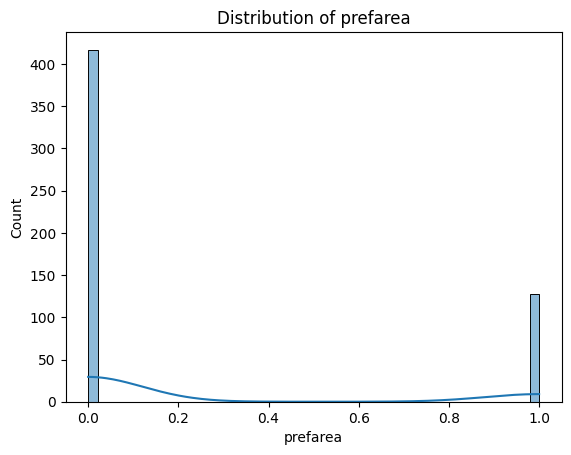

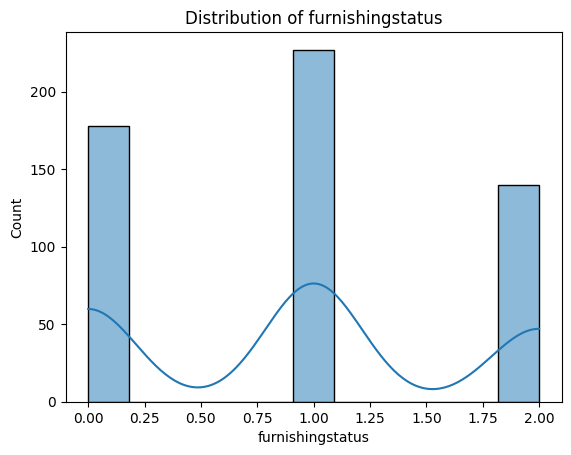

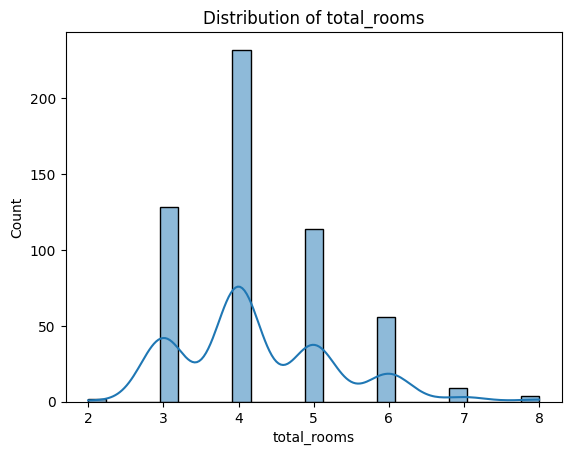

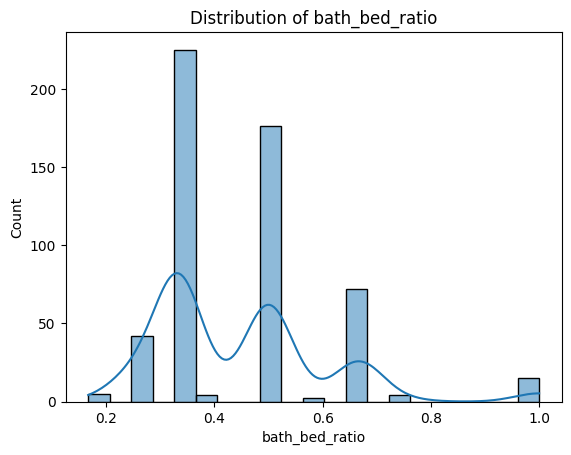

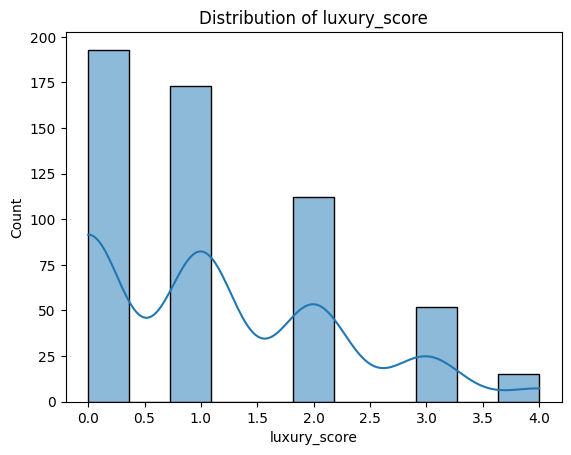

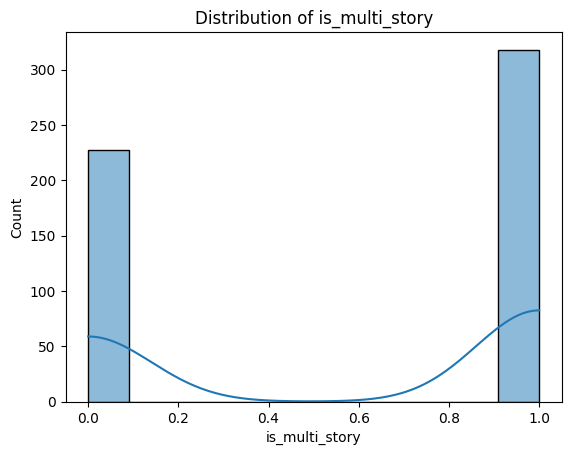

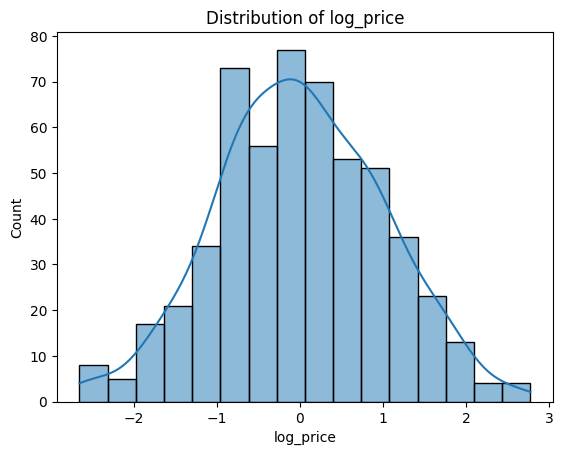

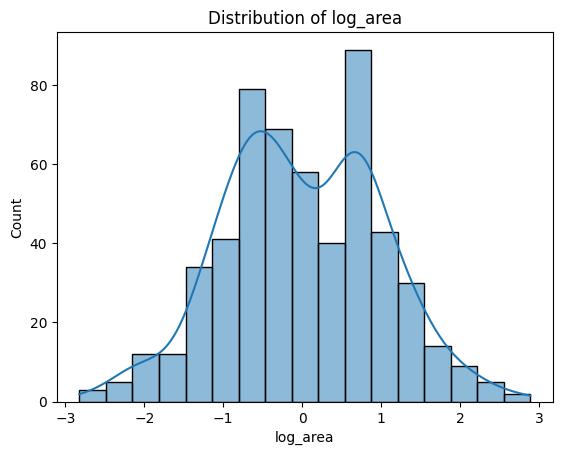

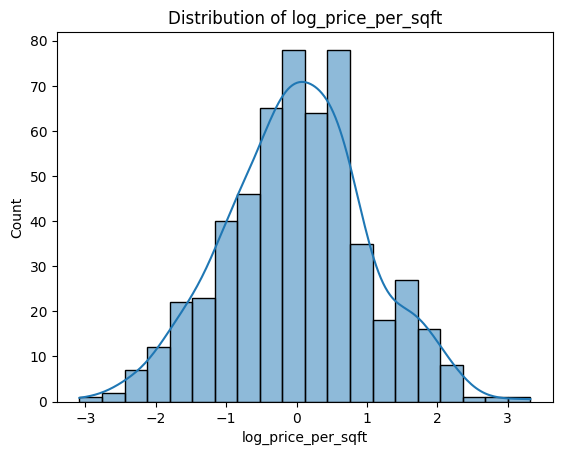

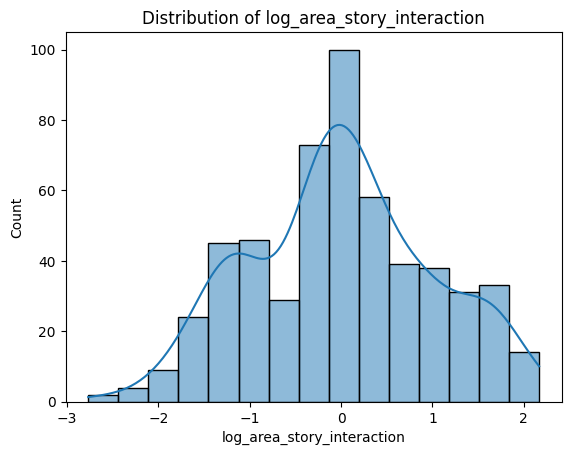

In [78]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

log_price = PowerTransformer()
log_area = PowerTransformer()
log_price_per_sqft = PowerTransformer()
log_area_story_interaction = PowerTransformer()

df["log_price"] = log_price.fit_transform(df[["price"]])
df["log_area"] = log_price.fit_transform(df[["area"]])
df["log_price_per_sqft"] = log_price_per_sqft.fit_transform(df[['price_per_sqft']])
df["log_area_story_interaction"] = log_area_story_interaction.fit_transform(df[['area_story_interaction']])


print("=======Visually check the 'MinMaxScaler' and 'LogTransformer'=======")
print("======= And drop the 'scaled_price and area' =======")
#scaled_vs_log_price = df[["price", "scaled_price", "log_price"]].hist()
#scaled_vs_log_are = df[["area", "scaled_area", "log_area"]].hist()


df.drop(columns=["price", "area", "price_per_sqft", "area_story_interaction"], inplace=True)

cols = df.columns

for c in cols:
    plt.figure()
    sns.histplot(data=df, x=c, kde=True)
    plt.title(f"Distribution of {c}")
    plt.show()


In [79]:
print("========== COLUMNS LEFT after dropping ==========")
print(df.columns.values)
df.describe()

========== COLUMNS LEFT after dropping ==========
['bedrooms' 'bathrooms' 'stories' 'mainroad' 'guestroom' 'basement'
 'hotwaterheating' 'airconditioning' 'parking' 'prefarea'
 'furnishingstatus' 'total_rooms' 'bath_bed_ratio' 'luxury_score'
 'is_multi_story' 'log_price' 'log_area' 'log_price_per_sqft'
 'log_area_story_interaction']


,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,total_rooms,bath_bed_ratio,luxury_score,is_multi_story,log_price,log_area,log_price_per_sqft,log_area_story_interaction
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02,5.450000e+02,5.450000e+02,5.450000e+02
mean,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.930275,4.251376,0.446361,1.124771,0.583486,-1.835677e-14,-3.546195e-15,-3.911244e-16,-9.908486e-16
std,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373,1.036611,0.159492,1.084242,0.493434,1.000919e+00,1.000919e+00,1.000919e+00,1.000919e+00
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.166667,0.000000,0.000000,-2.649870e+00,-2.820162e+00,-3.085099e+00,-2.768683e+00
25%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.333333,0.000000,0.000000,-6.848354e-01,-6.869862e-01,-6.705877e-01,-7.207874e-01
50%,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,0.400000,1.000000,1.000000,-3.865654e-02,-5.799972e-02,9.323726e-03,-1.918050e-02
75%,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,5.000000,0.500000,2.000000,1.000000,7.029461e-01,7.446617e-01,6.501562e-01,6.336319e-01
max,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000,8.000000,1.000000,4.000000,1.000000,2.770977e+00,2.888980e+00,3.321668e+00,2.168270e+00


In [82]:
y = df["log_price"]
X = df.drop(columns=["log_price"])

print(X.head())
print(y.head())

   bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0         4          2        3         1          0         0   
1         4          4        4         1          0         0   
2         3          2        2         1          0         1   
3         4          2        2         1          0         1   
4         4          1        2         1          1         1   

   hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  \
0                0                1        2         1                 2   
1                0                1        3         0                 2   
2                0                0        2         1                 1   
3                0                1        3         1                 2   
4                0                1        2         0                 2   

   total_rooms  bath_bed_ratio  luxury_score  is_multi_story  log_area  \
0            6        0.500000             2               1  1.115457  

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,         # 80/20 split
    random_state=42,       # reproducibility
)


In [85]:
!pwd

/Users/boy/Desktop/from-regression-to-production/01-housing-market-prediciton/notebooks


In [87]:
# SAVE SPLITS
X_train.to_csv("../data/processed/X_train.csv", index=False)
X_test.to_csv("../data/processed/X_test.csv", index=False)
y_train.to_csv("../data/processed/y_train.csv", index=False)
y_test.to_csv("../data/processed/y_test.csv", index=False)
